<a href="https://colab.research.google.com/github/araldi/FS22---Big-Data-Analysis-in-Biomedical-Research-376-1723-00L/blob/main/Week9/Classification_part1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The Titanic dataset

# Read data from Kaggle

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pylab as pl
import os
import json 

In [2]:
pip install kaggle 

In [3]:
from google.colab import drive

drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [4]:
cd gdrive/My\ Drive/

/content/gdrive/My Drive


create a file kaggle.json by requesting and API key to kaggle (under account)


https://www.kaggle.com/docs/api


and upload it to your google drive (manuallym outside of the notebook). Upload it to the general drive foloder and make sure it is still called kaggle.json

Change the permission on the file so that it is secure and cannot be seen used others. The update the environmental variables KAGGLE_USERNAME and KAGGLE_KEY based on the values on the file


In [6]:
!mkdir FS22_Big_Data_Analysis_in_Biomedical_Research


In [17]:
cd  FS22_Big_Data_Analysis_in_Biomedical_Research

/content/gdrive/MyDrive/FS22_Big_Data_Analysis_in_Biomedical_Research


In [18]:
!ls

kaggle.json


In [19]:
!chmod 600 kaggle.json

In [20]:
envs = json.load(open("kaggle.json", "r"))
os.environ["KAGGLE_USERNAME"] = envs['username']
os.environ["KAGGLE_KEY"] = envs['key']

In [21]:
#check that it worked by listing the kaggle datasets
!kaggle datasets list

ref                                                                            title                                             size  lastUpdated          downloadCount  voteCount  usabilityRating  
-----------------------------------------------------------------------------  -----------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
datasets/muratkokludataset/acoustic-extinguisher-fire-dataset                  Acoustic Extinguisher Fire Dataset               621KB  2022-04-02 22:59:36            408        417  0.9375           
datasets/piterfm/2022-ukraine-russian-war                                      2022 Ukraine Russia War                            2KB  2022-04-27 08:05:38          11945        651  1.0              
datasets/muhmores/spotify-top-100-songs-of-20152019                            Spotify Top 100 Songs of 2010-2019               139KB  2022-04-09 06:35:36           2141         49  0.8235294        


In [24]:
#create a directory for these data
!mkdir kaggleTitanic


In [25]:
cd kaggleTitanic

/content/gdrive/MyDrive/FS22_Big_Data_Analysis_in_Biomedical_Research/kaggleTitanic


In [26]:
# download the titanic data into the directory you created for it
!kaggle competitions download -c titanic

  0% 0.00/34.1k [00:00<?, ?B/s]
100% 34.1k/34.1k [00:00<00:00, 6.84MB/s]


In [31]:
!unzip titanic.zip

Archive:  titanic.zip
  inflating: gender_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [32]:
#read the data
titanic = pd.read_csv('/content/gdrive/My Drive/FS22_Big_Data_Analysis_in_Biomedical_Research/kaggleTitanic/train.csv').dropna(subset=["Survived", "Sex", "Pclass", "Age"])

In [33]:
titanic.shape

(714, 12)

In [35]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### Variable Notes

pclass: A proxy for socio-economic status (SES)
* 1st = Upper
* 2nd = Middle
* 3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...

* Sibling = brother, sister, stepbrother, stepsister
* Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...
* Parent = mother, father
* Child = daughter, son, stepdaughter, stepson

Some children travelled only with a nanny, therefore parch=0 for them.


# Data cleaning and wrangling

 
*   turn gender into numeric

*   drop NA



In [36]:
# turn gender into numeric
titanic["gender"] = titanic.Sex.map({'male':0, 'female':1})

In [37]:
# throw away data that you will not use
titanic = titanic[["Pclass", "gender", "Age", 'Survived']].dropna()

# Exploratory data analysis

## Exercise

Plot the main features in the most representative way

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


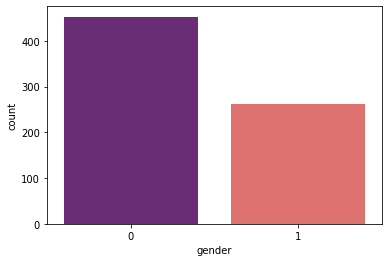

In [ ]:
sns.countplot(titanic['gender'], palette = 'magma')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


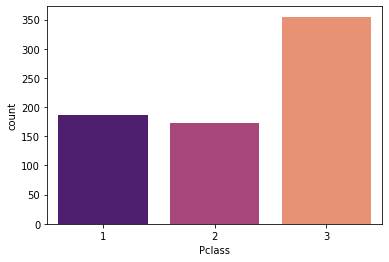

In [ ]:
sns.countplot(titanic['Pclass'], palette = 'magma')

Text(0, 0.5, 'Passengers [counts]')

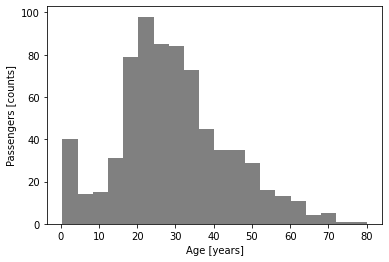

In [ ]:
plt.hist(titanic['Age'],  bins = 20, color = 'gray')
plt.xlabel('Age [years]')
plt.ylabel('Passengers [counts]')

# Test the purity of different splits

## First split

### Exercise
Split the cohort by
* gender
* age (younger or older than 6.5yo)
* class

And determine the fraction of survived/dead passengers in each split. The purest split is the one that has the highest proportion of individuals in one category.

# Run a tree model


In [38]:
from sklearn import tree

titanic_features = titanic[["Pclass", "gender", "Age"]]

#hyperparameters: gini and depth = 3
clf =  tree.DecisionTreeClassifier(max_depth=3, criterion="gini", 
                        random_state=2022).fit(titanic_features.values, 
                                              titanic["Survived"])
clf.score(titanic_features.values, titanic["Survived"])

0.8081232492997199

# Create a dendrogram visualization

In [39]:
import graphviz 

dot_data = tree.export_graphviz(clf, feature_names=titanic_features.columns, 
                                out_file=None) 
graph = graphviz.Source(dot_data) 

In [40]:
graph.render("TitanicTree")

'TitanicTree.pdf'

# Run ensemble method

## Random Forest

In [45]:
from sklearn import ensemble
rf =  ensemble.RandomForestClassifier(max_depth=3, criterion="gini", 
                                       random_state=2022).fit(titanic_features.values, 
                                                             titanic["Survived"])
print ("score %.2f"%rf.score(titanic_features.values, titanic["Survived"]))

score 0.82


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


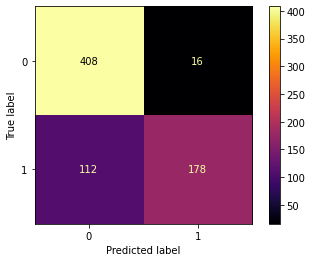

In [42]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(rf,titanic_features, titanic['Survived'], cmap='inferno',values_format='g')
plt.show()

In [43]:
# changing number of trees
rf =  ensemble.RandomForestClassifier(max_depth=2, criterion="gini", n_estimators=100,
                                       random_state=2022).fit(titanic_features.values, 
                                                             titanic["Survived"])
print ("score %.2f"%rf.score(titanic_features.values, titanic["Survived"]))

score 0.82


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


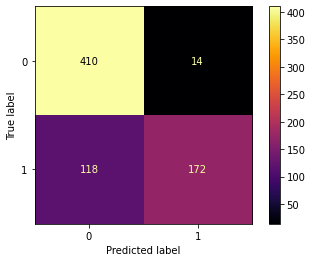

In [44]:

plot_confusion_matrix(rf,titanic_features, titanic['Survived'], cmap='inferno',values_format='g')
plt.show()

In [46]:
# changing max depth
rf =  ensemble.RandomForestClassifier(criterion="gini", max_depth=None, n_estimators=100,
                                       random_state=2022).fit(titanic_features.values, 
                                                             titanic["Survived"])
print ("score %.2f"%rf.score(titanic_features.values, titanic["Survived"]))

score 0.90


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


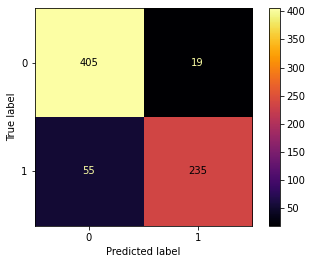

In [47]:

plot_confusion_matrix(rf,titanic_features, titanic['Survived'], cmap='inferno',values_format='g')
plt.show()

## Gradient Boosted Trees

In [ ]:
gbt =  ensemble.GradientBoostingClassifier(max_depth=4, 
                                           random_state=222).fit(titanic_features.values, 
                                                                 titanic["Survived"])
print ("score %.2f"%gbt.score(titanic_features.values, titanic["Survived"]))

score 0.89


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


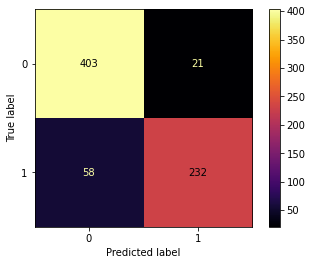

In [ ]:

plot_confusion_matrix(gbt,titanic_features, titanic['Survived'], cmap='inferno',values_format='g')
plt.show()

# Feature importance

In [ ]:
print("Random Forest feature importance")
for f,fi in zip (titanic_features.columns, rf.feature_importances_):
  print (f, fi.round(2))

Random Forest feature importance
Pclass 0.19
gender 0.35
Age 0.46


In [ ]:
print("Gradient Boosted Tree feature importance")
for f,fi in zip (titanic_features.columns, gbt.feature_importances_):
  print (f, fi.round(2))

Gradient Boosted Tree feature importance
Pclass 0.23
gender 0.47
Age 0.3


## calculate feature importance uncertainties for RF method


In [ ]:
fistd = np.std([tree.feature_importances_ for tree in rf.estimators_],
             axis=0)
print("Random Forest feature importance")
for f, fi, s in zip (titanic_features.columns, rf.feature_importances_, fistd):
  print (f, fi.round(2), "+/-", s.round(2))

Random Forest feature importance
Pclass 0.19 +/- 0.04
gender 0.35 +/- 0.05
Age 0.46 +/- 0.05


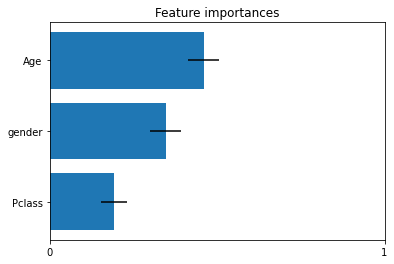

In [ ]:
indices = np.argsort(rf.feature_importances_)
pl.figure()
pl.title("Feature importances")
pl.barh(np.arange(rf.feature_importances_.shape[0]), 
        rf.feature_importances_[indices],
       xerr=fistd[indices], align="center")
pl.xticks(range(rf.feature_importances_.shape[0]), indices)
pl.yticks(range(rf.feature_importances_.shape[0]), 
          labels=titanic_short.columns[indices])
pl.xlim(0, 1)
pl.show()

# Predict survival

In [49]:
titanic_test = pd.read_csv('/content/gdrive/My Drive/FS22_Big_Data_Analysis_in_Biomedical_Research/kaggleTitanic/test.csv')

In [50]:
survived_test  = pd.read_csv('/content/gdrive/My Drive/FS22_Big_Data_Analysis_in_Biomedical_Research/kaggleTitanic/gender_submission.csv')

In [51]:
titanic_test = pd.merge(titanic_test, survived_test, on='PassengerId')

In [52]:
# turn gender into numeric
titanic_test["gender"] = titanic_test.Sex.map({'male':0, 'female':1})

# throw away data that you will not use
titanic_test = titanic_test[["Pclass", "gender", "Age", 'Survived']].dropna()

titanic_test_features = titanic_test[["Pclass", "gender", "Age"]]

In [53]:
predicted_survival = rf.predict(titanic_test_features)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [54]:
#function to print results with test set and prediction variable
from sklearn import metrics

def getresults(test,pred_variable):
    return 'Precision:', metrics.precision_score(test,pred_variable), 'Recall: ', metrics.recall_score(test,pred_variable),"Accuracy:", metrics.accuracy_score(test,pred_variable), "F1:", metrics.f1_score(test,pred_variable)

getresults(titanic_test['Survived'],predicted_survival)

('Precision:',
 0.7669172932330827,
 'Recall: ',
 0.8031496062992126,
 'Accuracy:',
 0.8313253012048193,
 'F1:',
 0.7846153846153846)

1 — Precision: It is implied as the measure of the correctly identified positive cases from all the predicted positive cases. Thus, it is useful when the costs of False Positives is high.

2 — Recall: It is the measure of the correctly identified positive cases from all the actual positive cases. It is important when the cost of False Negatives is high.

3 — Accuracy: One of the more obvious metrics, it is the measure of all the correctly identified cases. It is most used when all the classes are equally important.

4 — F1-score: This is the harmonic mean of Precision and Recall and gives a better measure of the incorrectly classified cases than the Accuracy Metric.


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


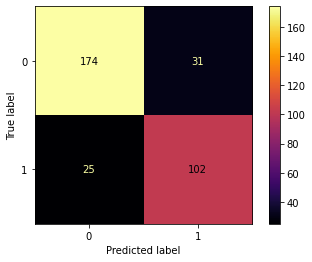

In [55]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(rf,titanic_test_features, titanic_test['Survived'], cmap='inferno',values_format='g')
plt.show()


#### Exercise

Test different hyperparameters in the Random Forest and Gradient Boosted Trees to get the best prediction for survival.